# Generate summary profiles
Run cluster analysis on the profiles to identify clusters of events with similar profiles.  
This is performed on the cumulative, normalised rainfall profiles.  
The objective is to group similar rainfall events based on how rainfall accumulates over time (regardless of individual intensities or durations).  
The output of this is centroids which represent the average cumulative profile of each cluster.   

### Convert cumulative rainfall data into intensity profiles
This is to better illustrate the characteristic behaviours/patterns revealed by clusters.  

This involves:  
- Converting cumulative rainfall to intensities (differentiating the cumulative rainfall with respect to time to obtain instantaneous rainfall intensities?)
- Normalising these intensities by a characteristic intensity, often the average intensity of each profile or the peak intensity.

In [249]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import os
import sys
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt    
import re
import pickle
import matplotlib.patches as mpatches
from statsmodels.graphics.mosaicplot import mosaic
from tabulate import tabulate

sys.path.insert(1, '../CreatingProfiles/')
from Analyse_Events_Functions import *
from Plot_events_functions import *

# Mosaic plots
For NIMROD 1km and UKCP18 2.2km data:  
The proportion of events which are F2, F1, C, B1, B2 for different durations.  
Duration bins are specified so that each duration contains the same number of events.  
Can also control the percent parameter, which controls whether to plot all profiles, or just top 1%/10% by volume

## Duration categories from this data (to create equally sized bins)

291
100
19395
100


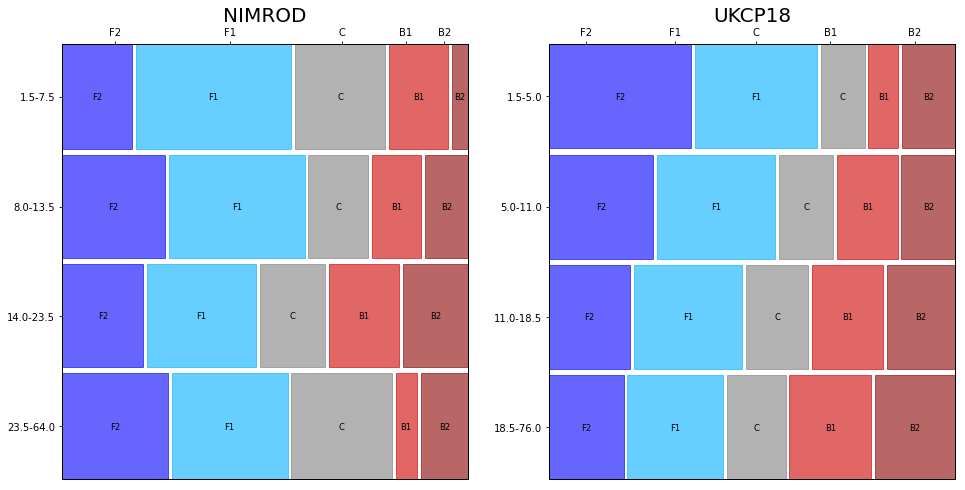

In [253]:
fig, axs = plt.subplots(ncols =2, figsize=(16,8))
data = format_data_for_plots("NIMROD_5mins/WholeYear/NIMROD_1km_unfiltered", duration_style = 'Real', seasons_flag=True, percent =100)
create_mosaic_plot(axs[0],data , cross_variable1 = 'DurationRange_personalised', cross_variable2='Loading', include_all= False)
axs[0].set_title('NIMROD', fontsize=20)
data = format_data_for_plots("NIMROD/WholeYear/NIMROD_1km_filtered_100", duration_style = 'Real', seasons_flag=True, percent =100)
create_mosaic_plot(axs[1],data, cross_variable1 = 'DurationRange_personalised', cross_variable2='Loading', include_all= False)
axs[1].set_title('UKCP18', fontsize=20);

19395
100
119020
100


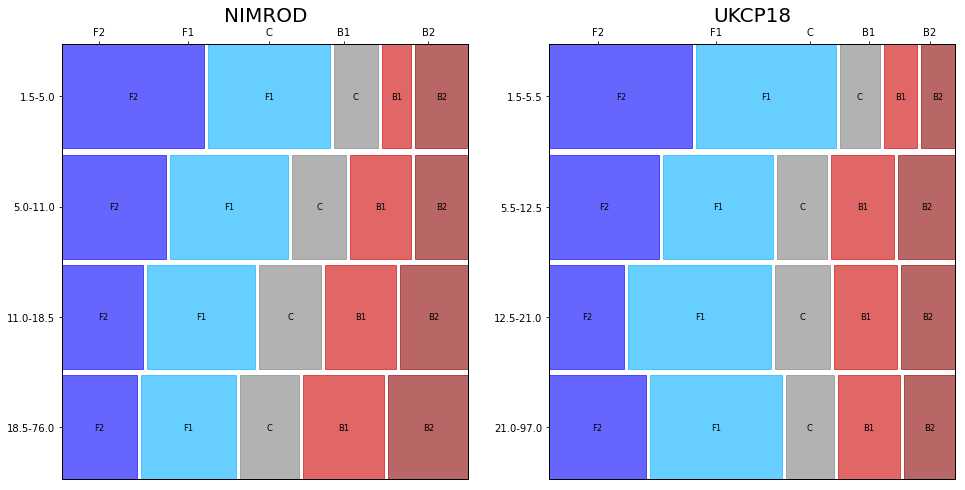

In [2]:
fig, axs = plt.subplots(ncols =2, figsize=(16,8))
data = format_data_for_plots("NIMROD/WholeYear/NIMROD_1km_filtered_100", duration_style = 'Real', seasons_flag=True, percent =100)
create_mosaic_plot(axs[0],data , cross_variable1 = 'DurationRange_personalised', cross_variable2='Loading', include_all= False)
axs[0].set_title('NIMROD', fontsize=20)
data = format_data_for_plots("UKCP18_30mins/bc005/model", duration_style = 'Real', seasons_flag=True, percent =100)
create_mosaic_plot(axs[1],data, cross_variable1 = 'DurationRange_personalised', cross_variable2='Loading', include_all= False)
axs[1].set_title('UKCP18', fontsize=20);

## Duration categories from rain gauge work

19395
10
119020
10


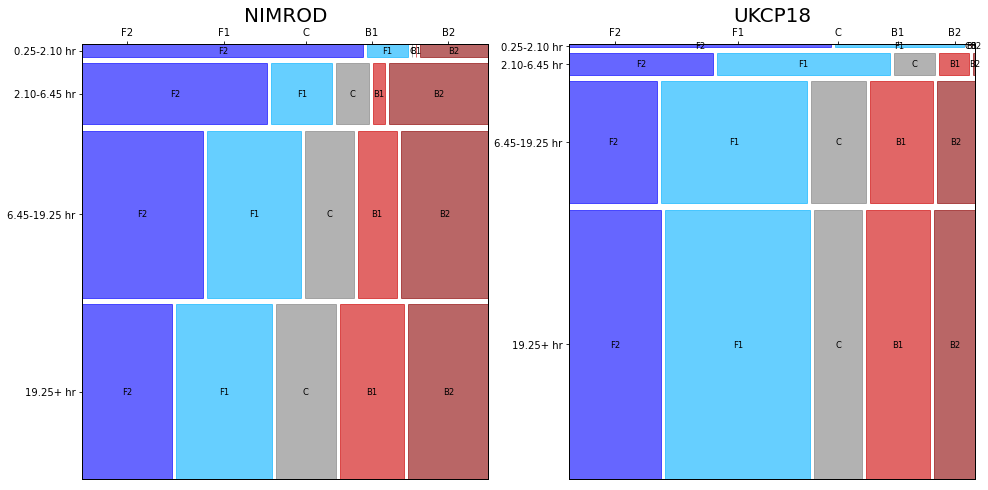

In [16]:
fig, axs = plt.subplots(ncols =2, figsize=(16,8))
data = format_data_for_plots("NIMROD/WholeYear/NIMROD_1km_filtered_100", duration_style = 'Real', seasons_flag=True)
create_mosaic_plot(axs[0],data , cross_variable1 = 'DurationRange_notpersonalised', cross_variable2='Loading', include_all= False)
axs[0].set_title('NIMROD', fontsize=20)
data = format_data_for_plots("UKCP18_30mins/bc005/model", duration_style = 'Real', seasons_flag=True)
create_mosaic_plot(axs[1],data, cross_variable1 = 'DurationRange_notpersonalised', cross_variable2='Loading', include_all= False)
axs[1].set_title('UKCP18', fontsize=20);

# Mosaic plots - split by season

291
100
119020
100


Text(0.5, 1.0, 'UKCP18')

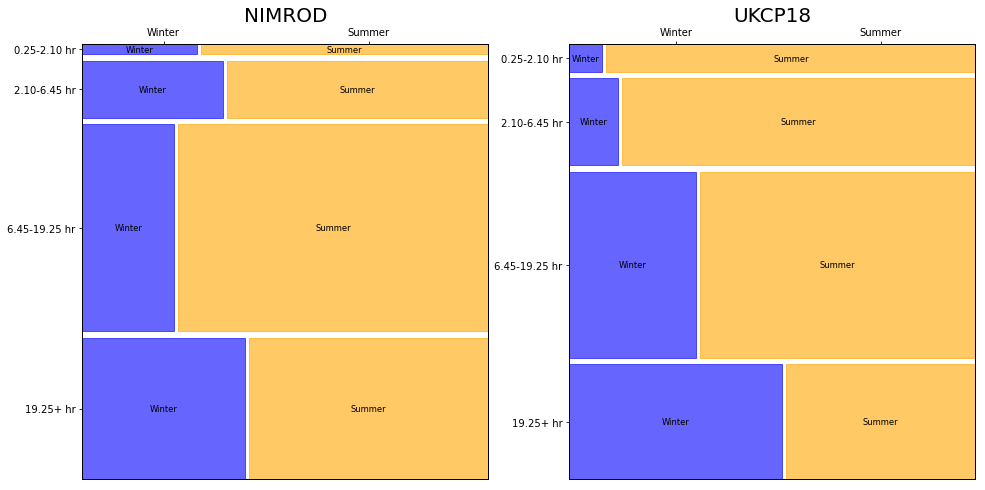

In [255]:
fig, axs = plt.subplots(ncols =2, figsize=(16,8))
data = format_data_for_plots("NIMROD/WholeYear/NIMROD_1km_filtered_100", duration_style = 'Real', seasons_flag=True, percent=100)
create_mosaic_plot(axs[0],data, cross_variable1 = 'DurationRange_notpersonalised', cross_variable2='Seasons', include_all= False )
axs[0].set_title('NIMROD', fontsize=20)
data = format_data_for_plots("UKCP18_30mins/bc005/model", duration_style = 'Real', seasons_flag=True, percent=100)
create_mosaic_plot(axs[1],data, cross_variable1 = 'DurationRange_notpersonalised', cross_variable2='Seasons', include_all= False)
axs[1].set_title('UKCP18', fontsize=20)
# Own duration bins
# fig, axs = plt.subplots(ncols =2, figsize=(16,8))
# data = format_data_for_plots("NIMROD/WholeYear/NIMROD_1km_filtered_100", duration_style = 'Real', seasons_flag=True, percent=100)
# create_mosaic_plot(axs[0],data, cross_variable1 = 'DurationRange_personalised', cross_variable2='Seasons', include_all= False )
# # axs[0].set_title('NIMROD', fontsize=20)
# data = format_data_for_plots("UKCP18_30mins/bc005/model", duration_style = 'Real', seasons_flag=True, percent=100)
# create_mosaic_plot(axs[1],data, cross_variable1 = 'DurationRange_personalised', cross_variable2='Seasons', include_all= False)
# # axs[1].set_title('UKCP18', fontsize=20)

# Contingency tables

In [256]:
# data = format_data_for_plots("NIMROD/WholeYear/NIMROD_1km_filtered_100", duration_style = 'Real', seasons_flag=True, percent=100)
data = format_data_for_plots("NIMROD_5mins/WholeYear/NIMROD_1km_unfiltered", duration_style = 'Real', seasons_flag=True, percent =100)
create_absolute_contingency_table(data, "DurationRange_notpersonalised")
create_contingency_table(data, "DurationRange_notpersonalised")

291
100
Absolute Contingency Table with 'All' Row:
+-------------------------------+----+----+----+----+----+
| DurationRange_notpersonalised | F2 | F1 | C  | B1 | B2 |
+-------------------------------+----+----+----+----+----+
|         0.25-2.10 hr          | 1  | 5  | 0  | 1  | 0  |
|         2.10-6.45 hr          | 8  | 13 | 13 | 5  | 1  |
|         6.45-19.25 hr         | 33 | 51 | 22 | 25 | 14 |
|           19.25+ hr           | 25 | 27 | 24 | 6  | 17 |
|              All              | 67 | 96 | 59 | 37 | 32 |
+-------------------------------+----+----+----+----+----+
Proportional Contingency Table with 'All' Row:
+------------------+------+------+------+------+------+
| DurationCategory |  F2  |  F1  |  C   |  B1  |  B2  |
+------------------+------+------+------+------+------+
|   0.25-2.10 hr   | 14.3 | 71.4 | 0.0  | 14.3 | 0.0  |
|   2.10-6.45 hr   | 20.0 | 32.5 | 32.5 | 12.5 | 2.5  |
|  6.45-19.25 hr   | 22.8 | 35.2 | 15.2 | 17.2 | 9.7  |
|    19.25+ hr     | 25.3 | 27.3 | 

In [131]:
data = format_data_for_plots("UKCP18_30mins/bc005/model", duration_style = 'Real', seasons_flag=True, percent=100)
create_absolute_contingency_table(data, "DurationRange_notpersonalised")
create_contingency_table(data, "DurationRange_notpersonalised")

119020
100
Absolute Contingency Table with 'All' Row:
+-------------------------------+-------+-------+-------+-------+-------+
| DurationRange_notpersonalised |  F2   |  F1   |   C   |  B1   |  B2   |
+-------------------------------+-------+-------+-------+-------+-------+
|         0.25-2.10 hr          | 4179  | 2503  |   7   |  101  | 1105  |
|         2.10-6.45 hr          | 7779  | 8840  | 3387  | 2865  | 2022  |
|         6.45-19.25 hr         | 12376 | 17566 | 7252  | 8618  | 7492  |
|           19.25+ hr           | 8028  | 11133 | 4076  | 5278  | 4413  |
|              All              | 32362 | 40042 | 14722 | 16862 | 15032 |
+-------------------------------+-------+-------+-------+-------+-------+
Proportional Contingency Table with 'All' Row:
+------------------+------+------+------+------+------+
| DurationCategory |  F2  |  F1  |  C   |  B1  |  B2  |
+------------------+------+------+------+------+------+
|   0.25-2.10 hr   | 52.9 | 31.7 | 0.1  | 1.3  | 14.0 |
|   2.10-

## Compare summary profiles for 1km for 5, 10, 15, 20 clusters

In [259]:
def create_profiles(profiles, num_clusters):
        
    # Create and fit the model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(profiles.tolist())

    return kmeans

def find_quintile_with_max_cumulative_rainfall(cumulative_rainfall):
    total_rainfall = cumulative_rainfall[-1]  # Total cumulative rainfall at the end
    total_time = len(cumulative_rainfall)  # Total time steps

    # Calculate the time index for each quintile
    quintile_times = np.linspace(0, total_time, 6, dtype=int)  # Divide into 5 equal parts

    # Calculate cumulative rainfall in each quintile
    quintile_rainfall = np.zeros(5)
    for i in range(5):
        start_idx = quintile_times[i]
        end_idx = quintile_times[i + 1] if i < 4 else total_time
        quintile_rainfall[i] = cumulative_rainfall[end_idx - 1] - cumulative_rainfall[start_idx]

    # Find the quintile with the maximum cumulative rainfall
    max_quintile = np.argmax(quintile_rainfall)

    # Return the quintile index (1-indexed)
    return max_quintile + 1

def plot_profiles(kmeans_clusters,durations, axs, row, color, linestyle):
    
    durations = durations.tolist()
    
    # Get cluster labels for each profile
    labels = kmeans_clusters.labels_
    centroids = kmeans_clusters.cluster_centers_
    df = pd.DataFrame({'cluster_num': labels, 'duration': durations})
    df['duration'] = pd.to_numeric(df['duration'])
    df.groupby('cluster_num')['duration'].mean()
    
    for num, centroid_cumulative in enumerate(centroids):
        
        # Time in hours
        time_hours = np.arange(len(centroid_cumulative))  
        
        # Convert cumulative to intensity (mm/hour)
        intensity = np.diff(centroid_cumulative) / np.diff(time_hours)
        
        # Calculate average intensity
        average_intensity = np.sum(intensity) / (time_hours[-1] - time_hours[0])

        # Normalize intensity by average intensity
        normalized_intensity = intensity / average_intensity
        
        # Find portion which is heaviest
        # heaviest_segment = categorize_normalized_rainstorm(centroid_cumulative)
        quintile_with_max_value = find_quintile_with_max_value(intensity)
        i = quintile_with_max_value

        axs[row, i].plot(time_hours[1:], normalized_intensity, color=color, linestyle=linestyle)
        if row == 0:
            axs[row, 0].set_title('F2')
            axs[row, 1].set_title('F1')
            axs[row, 2].set_title('C')
            axs[row, 3].set_title('B1')
            axs[row, 4].set_title('B2')

291
100


TypeError: cannot unpack non-iterable KMeans object

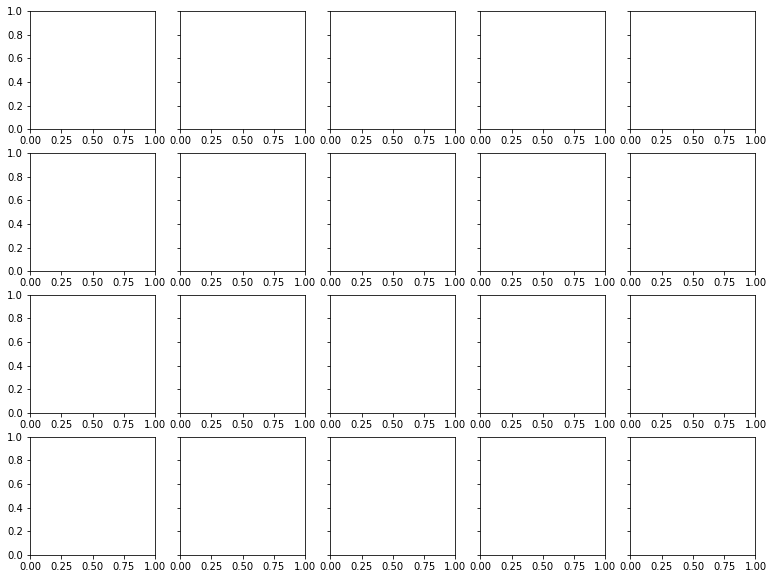

In [260]:
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(13, 10), sharey=True)

data = format_data_for_plots("NIMROD_5mins/WholeYear/NIMROD_1km_unfiltered", duration_style = 'Real', seasons_flag=True, percent =100)
for row, cluster_numbers in enumerate([5,10,15,20]):
    kmeans_clusters, durations = create_profiles(data['Profile'],  num_clusters = cluster_numbers)  
    plot_profiles(kmeans_clusters,data['Duration'], axs, row, color='black', linestyle='solid')
    
data = format_data_for_plots("UKCP18_30mins/bc005/model", duration_style = 'Real', seasons_flag=True, percent=100)
for row, cluster_numbers in enumerate([5,10,15,20]):
    kmeans_clusters, durations = create_profiles(data['Profile'], num_clusters = cluster_numbers)  
    plot_profiles(kmeans_clusters,data['Duration'], axs, row, color='green', linestyle='solid') 
    
    
# Define the legend patches
black_patch = mpatches.Patch(color='black', label='NIMROD (filtered (100))')
green_patch = mpatches.Patch(color='darkgreen', label='UKCP18 (BC005)')

# Adjust the layout to make space for the legend
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Add the legend to the figure
fig.legend(handles=[black_patch, green_patch], loc='upper center', fontsize = 14, bbox_to_anchor=(0.5, 1), ncol=3);

# Compare to rain gauge profiles - top 10% of storms

In [4]:
# Read in profiles
rvh_profiles = pd.read_csv("../../CatchmentAnalysis/CreateSyntheticRainfallEvents/ObservedProfiles/kmeans_15clustersPerDur.csv")
# Just keep prain (proportion of rainfall in each timestep)
rvh_profiles = rvh_profiles[rvh_profiles['Variable'] == 'irain']
rvh_profiles = rvh_profiles[rvh_profiles['Duration'] == '[2:10 - 6:45) hr']

19395
10


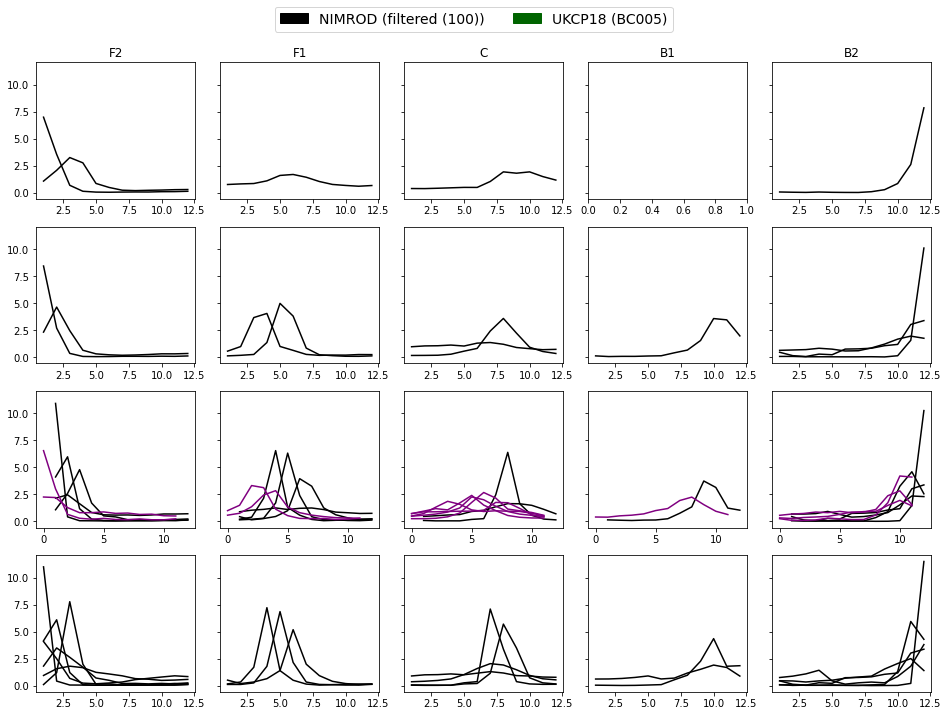

In [12]:
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(13, 10), sharey=True)

data = format_data_for_plots("NIMROD/WholeYear/NIMROD_1km_filtered_100", duration_style = 'Real', seasons_flag=True, percent=10)
for row, cluster_numbers in enumerate([5,10,15,20]):
    kmeans_clusters = create_profiles(data['Profile'],  num_clusters = cluster_numbers)  
    plot_profiles(kmeans_clusters,data['Duration'], axs, row, color='black', linestyle='solid')

for cluster_num in range(1,14):
    cluster1=rvh_profiles[rvh_profiles['Cluster']==cluster_num]
    cluster1 = cluster1[:-2]
    cluster1['Mean_cumulative'] = cluster1['Mean'].cumsum()
    quintile_with_max_value = find_quintile_with_max_cumulative_rainfall(np.array(cluster1['Mean_cumulative']))
    axs[2, quintile_with_max_value-1].plot(range(len(cluster1)),cluster1['Mean'], color='purple')  
    
# Define the legend patches
black_patch = mpatches.Patch(color='black', label='NIMROD (filtered (100))')
green_patch = mpatches.Patch(color='darkgreen', label='UKCP18 (BC005)')

# Adjust the layout to make space for the legend
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Add the legend to the figure
fig.legend(handles=[black_patch, green_patch], loc='upper center', fontsize = 14, bbox_to_anchor=(0.5, 1), ncol=3);

# Plot profiles clouds

119020
100


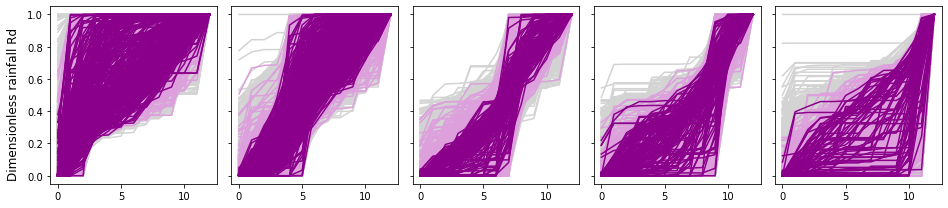

In [143]:
# Example usage:
data = format_data_for_plots("UKCP18_30mins/bc005/model", duration_style='Real', seasons_flag=True, percent=100)
# Plot profiles categorized by percentiles
plot_profiles_by_percentile(data['Profile'], data['Volume'], data['MaxQuintile'], percent_10=90, percent_1=99)


19395
100


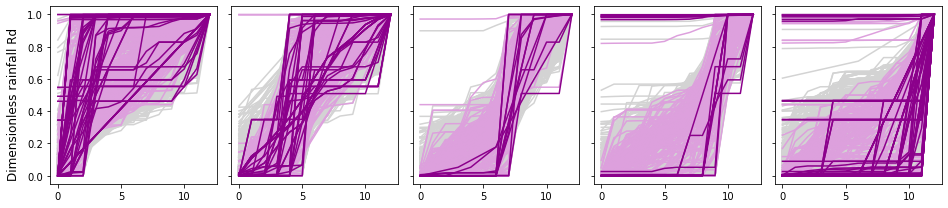

In [144]:
data = format_data_for_plots("NIMROD/WholeYear/NIMROD_1km_filtered_100", duration_style='Real', seasons_flag=True, percent=100)
# Plot profiles categorized by percentiles
plot_profiles_by_percentile(data['Profile'], data['Volume'], data['MaxQuintile'], percent_10=90, percent_1=99)